<a href="https://colab.research.google.com/github/MrsIgnis/IIS/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Кластеризация (методом k-средних)**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [52]:
data = np.array([[11.98144598, 9.76744987],
 [ 1.39362557, 5.09734252],
 [13.20456588,13.52540374],
 [13.4984684 ,11.87972878],
 [ 6.50899491, 1.75287692],
 [ 2.64829431, 5.58860956],
 [ 7.92614293, 1.61580503],
 [ 8.13442507, 1.13536125],
 [12.70495403,11.80395269],
 [ 4.45408479, 5.41013363],
 [ 6.85369523, 0.03509669],
 [12.4603808 ,12.29173071],
 [ 6.76293523, 0.88618739],
 [ 1.15671848, 6.88364199],
 [12.55797633,12.82025213],
 [12.1511384 ,11.0285996 ],
 [ 0.29185971, 5.13283572],
 [ 7.76434632, 0.74734415],
 [12.20958829,11.91897208],
 [ 6.80228061, 0.76444737],
 [ 8.01576486, 0.55002767],
 [ 0.74271395, 4.99352722],
 [ 3.16591539, 5.13248014],
 [ 6.44775228, 0.23466157],
 [12.91657983,11.7258564 ],
 [ 0.1807379 , 5.19074698],
 [ 0.13400313, 5.50199035],
 [11.3305601 ,11.21419432],
 [ 0.29806443, 5.48832672],
 [ 7.75569882, 1.45878139],
 [12.97380137,12.79352511],
 [ 6.67587991, 1.25468948],
 [12.60323824,13.55120955],
 [ 6.88304946, 0.35558858],
 [12.66475054,10.44878095],
 [ 1.97124592, 6.08849841],
 [ 0.94206486, 5.59764129],
 [ 1.24638213, 5.9912536 ],
 [ 7.33356189, 0.93312816],
 [ 2.76294612, 5.92095262],
 [ 6.66740498, 0.77562435],
 [13.64707422, 9.30490944]])

**I. Найти минимальное количество кластеров, обеспечивающих приемлемый уровень кластеризации**

In [53]:
# список для сохранения значений инерции (сумма квадратов расстояний от точек до ближ. центроидов)
inertia_values = []

In [54]:
# Перебираем количество кластеров
for k in range(2, 11):
  # объект KMeans с текущим количеством кластеров
  kmeans = KMeans( n_clusters = k)
  kmeans.fit( data )
  # Сохраняем значение инерции - мерой компактности кластеров.
  # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом
  inertia_values.append( kmeans.inertia_ )

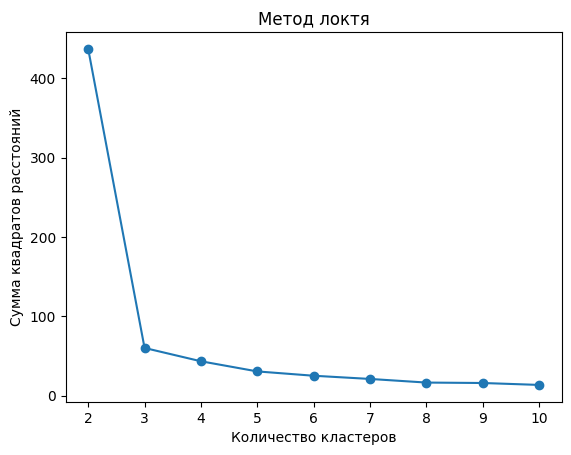

In [55]:
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()

На графике падение кривой становится наименее резким в месте с 2 до 3. Поэтому, согласно графику локтя, оптимальным количеством кластеров является 3.

In [56]:
kmeans = KMeans( n_clusters = 3 )

**II. Выполнить кластеризацию данного множества точек методом k-средних по найденному количеству кластеров**

In [57]:
# Производим кластеризацию данных
kmeans.fit(data)

KMeans(n_clusters=3)

In [58]:
# метки кластеров для каждого объекта
labels = kmeans.labels_

# координаты центроидов
centroids = kmeans.cluster_centers_

**III. Напечатать: количество точек в каждом кластере и координаты центроидов кластеров**


In [59]:
print("Метки кластеров:")
print(labels)

Метки кластеров:
[0 2 0 0 1 2 1 1 0 2 1 0 1 2 0 0 2 1 0 1 1 2 2 1 0 2 2 0 2 1 0 1 0 1 0 2 2
 2 1 2 1 0]


In [60]:
print("Координаты центроидов кластеров:")
print(centroids)

Координаты центроидов кластеров:
[[12.63603731 11.71961181]
 [ 7.18085232  0.89283   ]
 [ 1.52776119  5.57271291]]


В кластере с меткой 0 содержится 14 точек
В кластере с меткой 1 содержится 14 точек
В кластере с меткой 2 содержится 14 точек


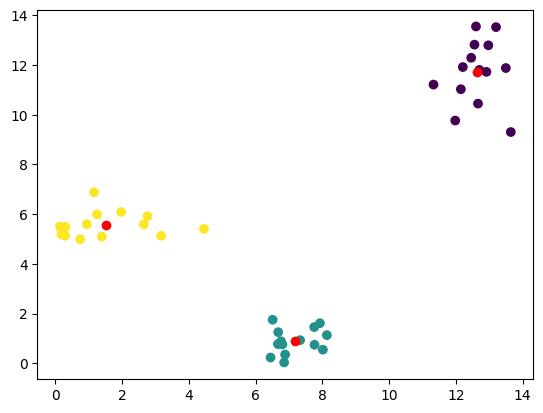

In [61]:
labelNum = np.unique(labels)
for v in labelNum:
  print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек"  )

plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()

**IV. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений параметра random_state**

In [62]:
# Оптимальное количество кластеров, найденное по графику локтя
optimal_k = 3

random_states_to_test = [0, 42, 100]

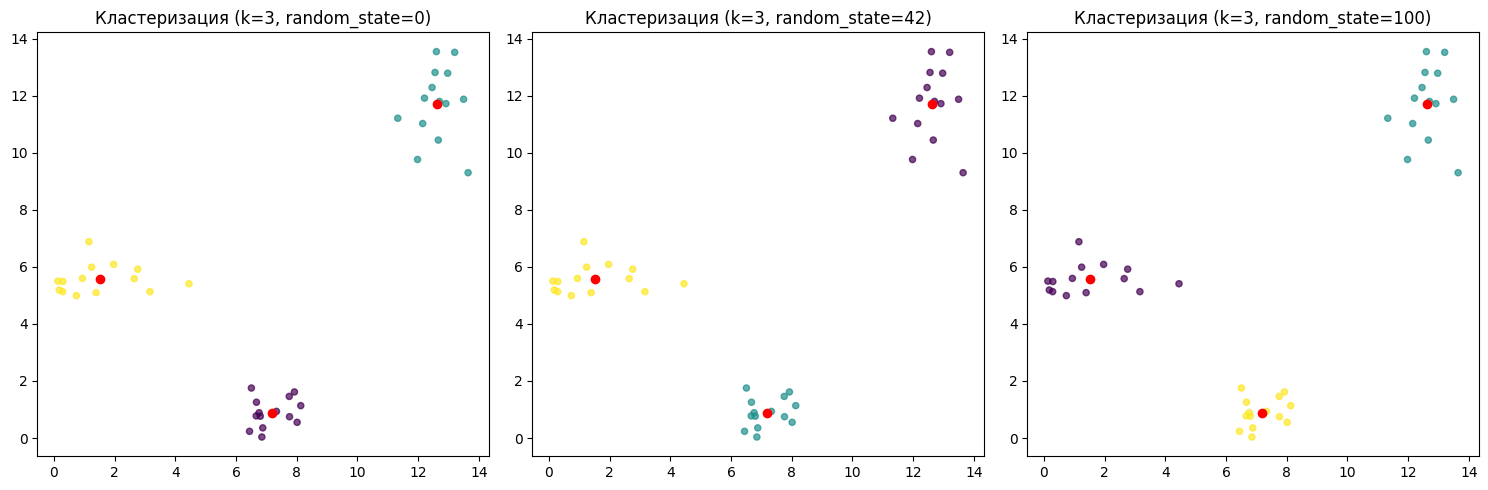

In [63]:
plt.figure(figsize=(15, 5))

for i, rs in enumerate(random_states_to_test):
    kmeans_rs = KMeans(n_clusters=optimal_k, random_state=rs, n_init='auto')

    labels_rs = kmeans_rs.fit_predict(data)
    centroids_rs = kmeans_rs.cluster_centers_

    plt.subplot(1, 3, i + 1)
    plt.scatter(data[:, 0], data[:, 1], c=labels_rs, cmap='viridis', s=20, alpha=0.7)
    plt.scatter(centroids_rs[:, 0], centroids_rs[:, 1], c='r')
    plt.title(f"Кластеризация (k={optimal_k}, random_state={rs})")

plt.tight_layout()
plt.show()

In [65]:
for i, rs in enumerate(random_states_to_test):
    kmeans_rs = KMeans(n_clusters=optimal_k, random_state=rs, n_init='auto')
    labels_rs = kmeans_rs.fit_predict(data)
    centroids_rs = kmeans_rs.cluster_centers_
    print(f"\nrandom_state={rs}:")
    print(f"  Центроиды: {centroids_rs}")
    label_counts = np.bincount(labels_rs)
    for cluster_id, count in enumerate(label_counts):
        print(f"  Кластер {cluster_id}: {count} точек")


random_state=0:
  Центроиды: [[ 7.18085232  0.89283   ]
 [12.63603731 11.71961181]
 [ 1.52776119  5.57271291]]
  Кластер 0: 14 точек
  Кластер 1: 14 точек
  Кластер 2: 14 точек

random_state=42:
  Центроиды: [[12.63603731 11.71961181]
 [ 7.18085232  0.89283   ]
 [ 1.52776119  5.57271291]]
  Кластер 0: 14 точек
  Кластер 1: 14 точек
  Кластер 2: 14 точек

random_state=100:
  Центроиды: [[ 1.52776119  5.57271291]
 [12.63603731 11.71961181]
 [ 7.18085232  0.89283   ]]
  Кластер 0: 14 точек
  Кластер 1: 14 точек
  Кластер 2: 14 точек
